# Business Understanding

My business questions:

Trend of airbnb in Seattle (Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?)

Geenral downward trend
More avaibility over time
Decreasing trend on number of reviews

What do customers need to give high ratings? 

I want to start an airbnb - what can I charge based on what I have




# Question1 - Trend in Seattle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_calendar = pd.read_csv('./calendar.csv')
df_calendar.info()
df_calendar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


<AxesSubplot:xlabel='year,month'>

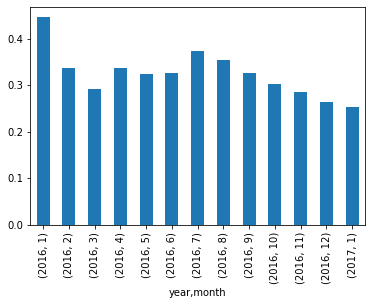

In [6]:
#Occupancy rate is decreasing

df_calendar["date"] = pd.to_datetime(df_calendar["date"])
df_calendar["month"] = pd.DatetimeIndex(df_calendar['date']).month
df_calendar["year"] = pd.DatetimeIndex(df_calendar['date']).year

df_calendar["available_01"] = df_calendar["available"].replace({'t': 0, 'f': 1})

(df_calendar.groupby(["year", "month"]).sum()["available_01"]/df_calendar.groupby(["year", "month"]).count()["listing_id"]).plot(kind='bar')


In [8]:
df_reviews = pd.read_csv('./reviews.csv')
df_reviews.info()
df_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [ ]:
#Would be nice to show a regression / trend line here

<AxesSubplot:xlabel='year,month'>

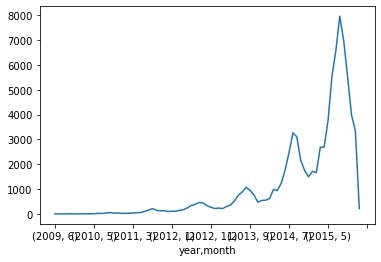

In [88]:
df_reviews["date"] = pd.to_datetime(df_reviews["date"])
df_reviews["month"] = pd.DatetimeIndex(df_reviews['date']).month
df_reviews["year"] = pd.DatetimeIndex(df_reviews['date']).year

df_reviews.groupby(['year','month']).count()['id'].plot(kind="line")



# Question 2 - how much can I charge for XX

In [95]:
df_listings['price_cleaned'] = df_listings['price'].str.replace("[$, ]", "").astype("float")
df_listings['price_cleaned']

/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_1386/4048940523.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listings['price_cleaned'] = df_listings['price'].str.replace("[$, ]", "").astype("float")


0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price_cleaned, Length: 3818, dtype: float64

{'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'first_review',
 'host_about',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'last_review',
 'license',
 'medium_url',
 'monthly_price',
 'neighborhood_overview',
 'neighbourhood',
 'notes',
 'property_type',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'reviews_per_month',
 'security_deposit',
 'space',
 'square_feet',
 'summary',
 'thumbnail_url',
 'transit',
 'weekly_price',
 'xl_picture_url',
 'zipcode'}

# Question 3 - What does my target market want?

In [267]:
df_listings = pd.read_csv('./listings.csv')
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [221]:
drop_cols = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'description', 'experiences_offered', 
             'neighborhood_overview', 'transit','thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 
             'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 
            'host_neighbourhood', 'street', 'space', 'notes' , 'city', 'state', 'is_location_exact', 
             'market', 'calendar_updated', 'first_review', 'last_review', 'jurisdiction_names', 'smart_location', 'country_code',
             'country']

df_listings.drop(columns = drop_cols, inplace=True)


In [269]:
#Columns that should be floats

df_listings['host_response_rate'] = df_listings['host_response_rate'].str.replace("%","").astype(float, errors = 'raise')
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].str.replace("%","").astype(float, errors = 'raise')
df_listings['price'] = df_listings['price'].str.replace("[$, ]", "").astype("float")
df_listings['weekly_price'] = df_listings['weekly_price'].str.replace("[$, ]", "").astype(float, errors = 'raise')
df_listings['monthly_price'] = df_listings['monthly_price'].str.replace("[$, ]", "").astype(float, errors = 'raise')
df_listings['security_deposit'] = df_listings['security_deposit'].str.replace("[$, ]", "").astype(float, errors = 'raise')
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].str.replace("[$, ]", "").astype(float, errors = 'raise')
df_listings['extra_people'] = df_listings['extra_people'].str.replace("[$, ]", "").astype(float, errors = 'raise')


/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_9113/2506457984.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listings['price'] = df_listings['price'].str.replace("[$, ]", "").astype("float")
/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_9113/2506457984.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listings['weekly_price'] = df_listings['weekly_price'].str.replace("[$, ]", "").astype(float, errors = 'raise')
/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_9113/2506457984.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listings['monthly_price'] = df_listings['monthly_price'].str.replace("[$, ]", "").astype(float, errors = 'raise')
/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_9113/2506457984.py:8: FutureWarning: The default value of regex will change from True to Fals

In [270]:
#True and Falses
df_listings["host_is_superhost"].replace({'t': 1, 'f': 0}, inplace=True)
df_listings["host_has_profile_pic"].replace({'t': 1, 'f': 0}, inplace=True)
df_listings["host_identity_verified"].replace({'t': 1, 'f': 0}, inplace=True)
df_listings["requires_license"].replace({'t': 1, 'f': 0}, inplace=True)
df_listings["instant_bookable"].replace({'t': 1, 'f': 0}, inplace=True)
df_listings["require_guest_profile_picture"].replace({'t': 1, 'f': 0}, inplace=True)
df_listings["require_guest_phone_verification"].replace({'t': 1, 'f': 0}, inplace=True)
df_listings["has_availability"].replace({'t': 1, 'f': 0}, inplace=True)

In [271]:
#Fix host

df_listings["host_since"] = pd.to_datetime(df_listings["host_since"])
df_listings["calendar_last_scraped"] = pd.to_datetime(df_listings["calendar_last_scraped"])
df_listings["host_for"] =  (df_listings["calendar_last_scraped"] - df_listings['host_since']).dt.days
df_listings.drop(columns = ['host_since', 'calendar_last_scraped'], inplace=True)


In [272]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [273]:
# My new metric

df_listings['EstimatedIncome'] = df_listings['price'] * (365-df_listings['availability_365'])
df_listings['EstimatedIncome'] 


0         1615.0
1        11100.0
2       141375.0
3        22200.0
4            0.0
          ...   
3813    119547.0
3814      7268.0
3815     25761.0
3816     18414.0
3817     31146.0
Name: EstimatedIncome, Length: 3818, dtype: float64

In [254]:
numeric_features = df_listings.select_dtypes(include=['float64', 'int64'])
numeric_features

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,...,review_scores_value,requires_license,license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_for,EstimatedIncome
0,96.0,100.0,0.0,3.0,3.0,1.0,1.0,47.636289,-122.371025,4,...,10.0,0,NaN,0,0,0,2,4.07,1607.0,1615.0
1,98.0,100.0,1.0,6.0,6.0,1.0,1.0,47.639123,-122.365666,4,...,10.0,0,NaN,0,1,1,6,1.48,1047.0,11100.0
2,67.0,100.0,0.0,2.0,2.0,1.0,1.0,47.629724,-122.369483,11,...,10.0,0,NaN,0,0,0,2,1.15,571.0,141375.0
3,NaN,NaN,0.0,1.0,1.0,1.0,1.0,47.638473,-122.369279,3,...,NaN,0,NaN,0,0,0,1,NaN,789.0,22200.0
4,100.0,NaN,0.0,2.0,2.0,1.0,1.0,47.632918,-122.372471,6,...,9.0,0,NaN,0,0,0,1,0.89,1497.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,99.0,100.0,0.0,354.0,354.0,1.0,1.0,47.664295,-122.359170,6,...,8.0,0,NaN,0,0,0,8,0.30,266.0,119547.0
3814,100.0,100.0,0.0,1.0,1.0,1.0,1.0,47.649552,-122.318309,4,...,10.0,0,NaN,0,0,0,1,2.00,82.0,7268.0
3815,NaN,NaN,0.0,1.0,1.0,1.0,0.0,47.508453,-122.240607,2,...,NaN,0,NaN,0,0,0,1,NaN,5.0,25761.0
3816,100.0,NaN,0.0,1.0,1.0,1.0,1.0,47.632335,-122.275530,2,...,NaN,0,NaN,0,0,0,1,NaN,366.0,18414.0


In [228]:
categorical_features = df_listings.select_dtypes(include=['object'])
categorical_features

,host_response_time,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,property_type,room_type,bed_type,cancellation_policy
0,within a few hours,Queen Anne,West Queen Anne,Queen Anne,98119,Apartment,Entire home/apt,Real Bed,moderate
1,within an hour,Queen Anne,West Queen Anne,Queen Anne,98119,Apartment,Entire home/apt,Real Bed,strict
2,within a few hours,Queen Anne,West Queen Anne,Queen Anne,98119,House,Entire home/apt,Real Bed,strict
3,NaN,Queen Anne,West Queen Anne,Queen Anne,98119,Apartment,Entire home/apt,Real Bed,flexible
4,within an hour,Queen Anne,West Queen Anne,Queen Anne,98119,House,Entire home/apt,Real Bed,strict
...,...,...,...,...,...,...,...,...,...
3813,within a few hours,Fremont,Fremont,Other neighborhoods,98107,House,Entire home/apt,Real Bed,strict
3814,within an hour,Portage Bay,Portage Bay,Capitol Hill,98102,Apartment,Entire home/apt,Real Bed,moderate
3815,NaN,NaN,Rainier Beach,Rainier Valley,98178,House,Entire home/apt,Real Bed,moderate
3816,within an hour,NaN,Madison Park,Capitol Hill,98112,Condominium,Entire home/apt,Real Bed,moderate


In [239]:
df_listings

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,...,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_for,EstimatedIncome
0,within a few hours,96.0,100.0,0.0,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1.0,1.0,Queen Anne,...,0,NaN,0,moderate,0,0,2,4.07,1607.0,345.95
1,within an hour,98.0,100.0,1.0,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",1.0,1.0,Queen Anne,...,0,NaN,0,strict,1,1,6,1.48,1047.0,444.00
2,within a few hours,67.0,100.0,0.0,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1.0,1.0,Queen Anne,...,0,NaN,0,strict,0,0,2,1.15,571.0,4485.00
3,NaN,NaN,NaN,0.0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1.0,1.0,Queen Anne,...,0,NaN,0,flexible,0,0,1,NaN,789.0,NaN
4,within an hour,100.0,NaN,0.0,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1.0,1.0,Queen Anne,...,0,NaN,0,strict,0,0,1,0.89,1497.0,400.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,within a few hours,99.0,100.0,0.0,354.0,354.0,"['email', 'phone', 'linkedin', 'reviews', 'jum...",1.0,1.0,Fremont,...,0,NaN,0,strict,0,0,8,0.30,266.0,323.10
3814,within an hour,100.0,100.0,0.0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1.0,1.0,Portage Bay,...,0,NaN,0,moderate,0,0,1,2.00,82.0,316.00
3815,NaN,NaN,NaN,0.0,1.0,1.0,['phone'],1.0,0.0,NaN,...,0,NaN,0,moderate,0,0,1,NaN,5.0,NaN
3816,within an hour,100.0,NaN,0.0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1.0,1.0,NaN,...,0,NaN,0,moderate,0,0,1,NaN,366.0,NaN


In [274]:
#Take a look at the amenities of the current listings
df_amenities = df_listings['amenities'].value_counts().reset_index()
df_amenities.head()

,index,amenities
0,{},45
1,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",11
2,"{TV,""Cable TV"",Internet,""Wireless Internet"",Po...",10
3,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",8
4,"{TV,Internet,""Wireless Internet"",""Air Conditio...",7


In [275]:
# The items are grouped together if the listing contains more than one amenity. 
# We need to clean this up by plsitting the list items into rows
df_listings['amenities'] = df_listings['amenities'].str.replace('"', '')
df_listings['amenities'] = df_listings['amenities'].str.replace('{', '')
df_listings['amenities'] = df_listings['amenities'].str.replace('}', '')


/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_9113/2138164168.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listings['amenities'] = df_listings['amenities'].str.replace('{', '')
/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_9113/2138164168.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listings['amenities'] = df_listings['amenities'].str.replace('}', '')


In [317]:
# Function to get total count of a column with lists

def total_count(df, col):
    
    count_rows = df.shape[0]
    
    new_df = df[col].value_counts().reset_index()
    new_df.rename(columns={'index': col, col: 'count'}, inplace=True)
    new_df[col] = new_df[col].str.split(",")
    new_df = new_df.explode(col).reset_index(drop=True)
    new_df = new_df.groupby([col]).sum()['count'].reset_index()
    new_df = new_df.sort_values('count', ascending=False)
    new_df['perc'] = new_df['count']/count_rows
    
    return new_df

In [319]:
df_total = total_count(df_listings, 'amenities')


Need these for the basics to even be considered. Bottom ones are to differentiate yourself from the majority. 
I care more about those amenities from people who make more 

In [276]:
df_listings["EstimatedIncome"].describe()

count      3818.000000
mean      15564.097957
std       22625.324377
min           0.000000
25%         476.250000
50%        6392.000000
75%       23622.500000
max      364635.000000
Name: EstimatedIncome, dtype: float64

In [287]:
#Lets check what the top 75% of people are doing/ have

df_Top75 = df_listings[(df_listings["EstimatedIncome"] >= 23622.500000)]
df_Top75["amenities"]


2       TV,Cable TV,Internet,Wireless Internet,Air Con...
15      TV,Cable TV,Internet,Kitchen,Free Parking on P...
18      TV,Cable TV,Internet,Wireless Internet,Kitchen...
22      TV,Wireless Internet,Kitchen,Free Parking on P...
24      TV,Cable TV,Wireless Internet,Kitchen,Free Par...
                              ...                        
3801    TV,Cable TV,Internet,Wireless Internet,Kitchen...
3806    Internet,Wireless Internet,Kitchen,Heating,Smo...
3813    TV,Cable TV,Internet,Wireless Internet,Air Con...
3815    Cable TV,Wireless Internet,Kitchen,Free Parkin...
3817    TV,Cable TV,Internet,Wireless Internet,Kitchen...
Name: amenities, Length: 955, dtype: object

In [320]:
 df_theTop = total_count(df_Top75, "amenities")

In [336]:
df_combined = pd.merge(df_total, df_theTop, on='amenities', how = 'inner')
df_combined['diff'] = df_combined['perc_y'] - df_combined['perc_x']
df_combined.sort_values('diff', ascending =False)






,amenities,count_x,perc_x,count_y,perc_y,diff
9,TV,2574,0.674175,742,0.776963,0.102788
13,Family/Kid Friendly,1963,0.514144,581,0.608377,0.094233
19,Elevator in Building,785,0.205605,286,0.299476,0.093871
10,Carbon Monoxide Detector,2485,0.650864,681,0.713089,0.062225
7,Internet,2811,0.736249,756,0.791623,0.055374
23,Safety Card,727,0.190414,234,0.245026,0.054612
2,Kitchen,3423,0.896543,908,0.950785,0.054243
29,Gym,442,0.115767,161,0.168586,0.052819
5,Dryer,2997,0.784966,799,0.836649,0.051683
6,Washer,2992,0.783656,795,0.832461,0.048804


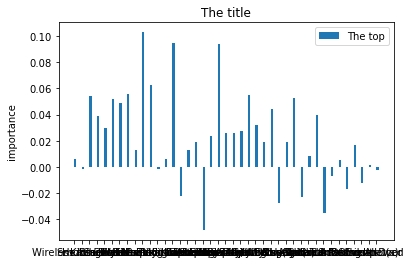

In [337]:
x = np.arange(len(df_combined['amenities']))
width = 0.3

labels = df_combined['amenities']
y1 = df_combined['perc_x']
y2 = df_combined['perc_y']
y3 = df_combined['diff']


fig, ax = plt.subplots()
#bar1 = ax.bar(x - width/2, y1, width, label='Overall')
#bar2 = ax.bar(x + width/2, y2, width, label='The top')
bar3 = ax.bar(x + width/2, y3, width, label='The top')

ax.set_ylabel('importance')
ax.set_title('The title')
ax.set_xticks(x, labels)
ax.legend()

#ax.bar_label(bar1)
#ax.bar_label(bar2)
#ax.bar_label(bar3)


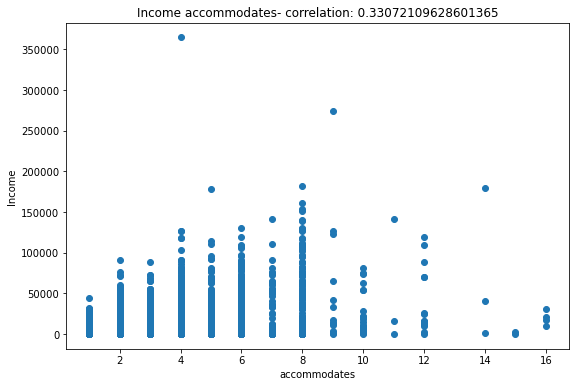

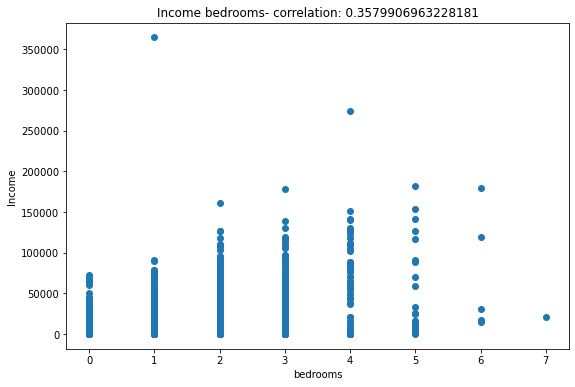

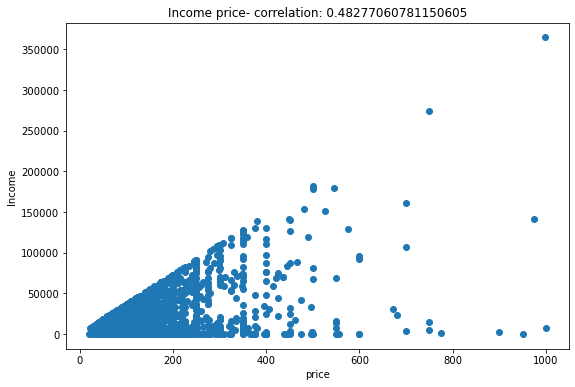

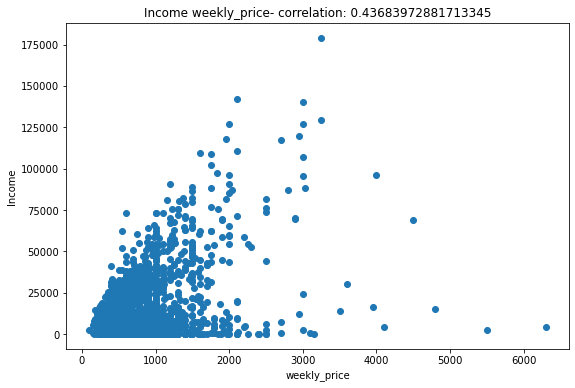

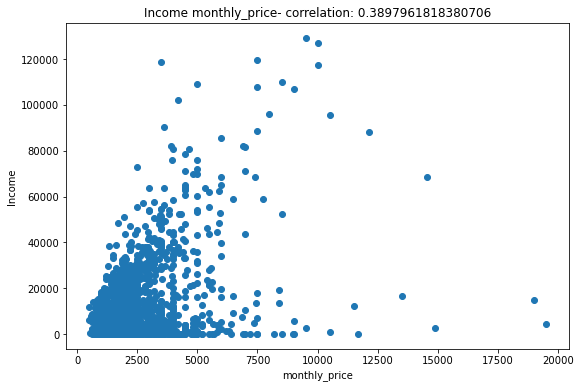

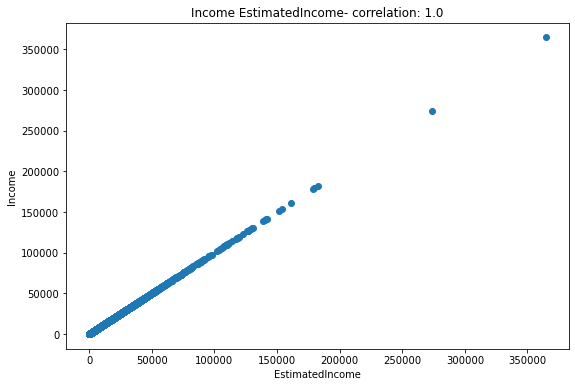

In [259]:

#label = df_listings["reviews_per_month"]
label = df_listings["EstimatedIncome"]

for col in numeric_features:
    feature = df_listings[col]
    correlation = feature.corr(label)
    if correlation > 0.3:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        plt.scatter(x=feature, y=label)
        plt.xlabel(col)
        plt.ylabel("Income")
        ax.set_title('Income ' + col + '- correlation: ' + str(correlation))
plt.show()

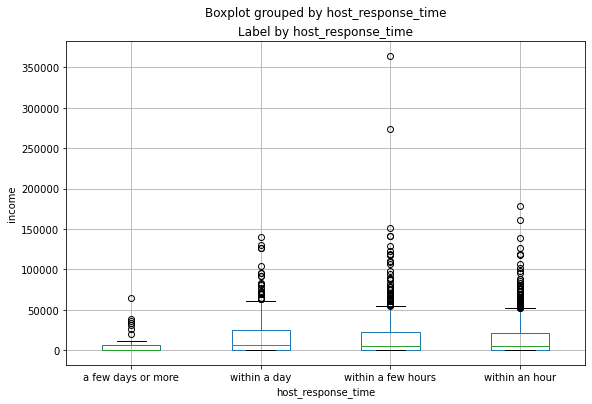

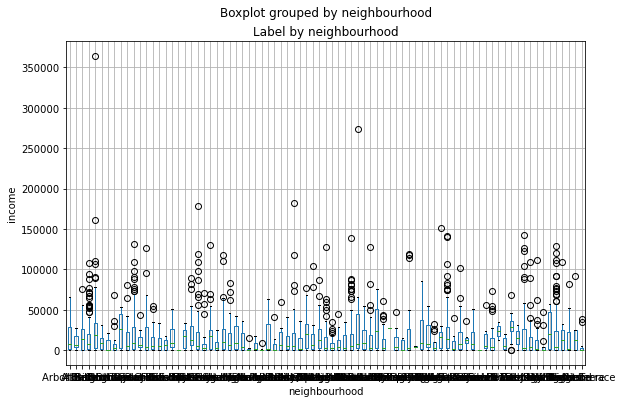

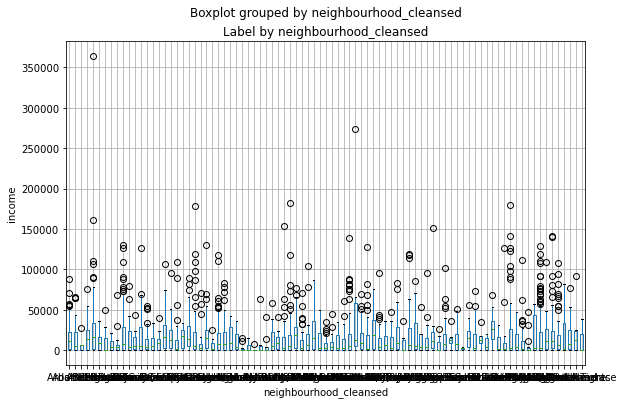

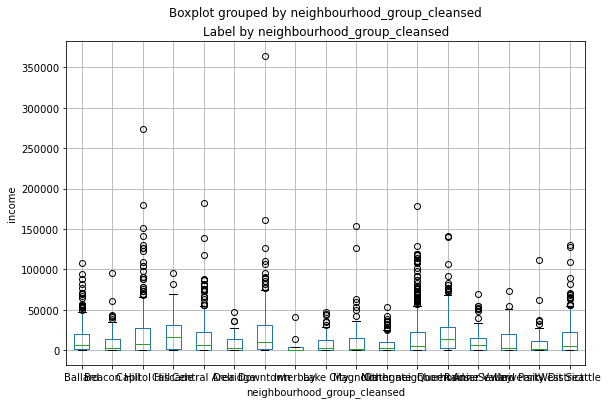

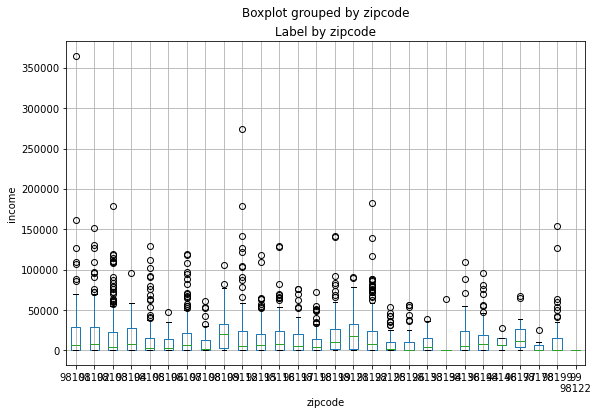

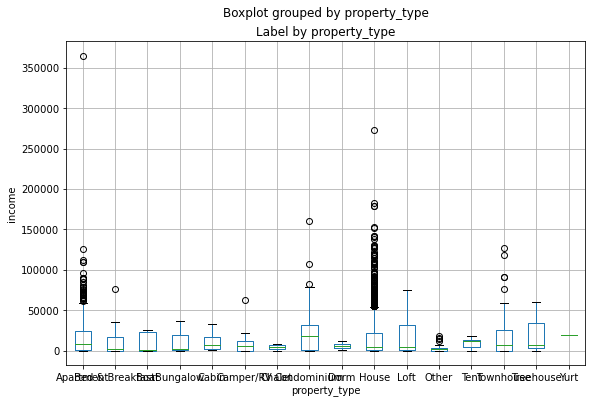

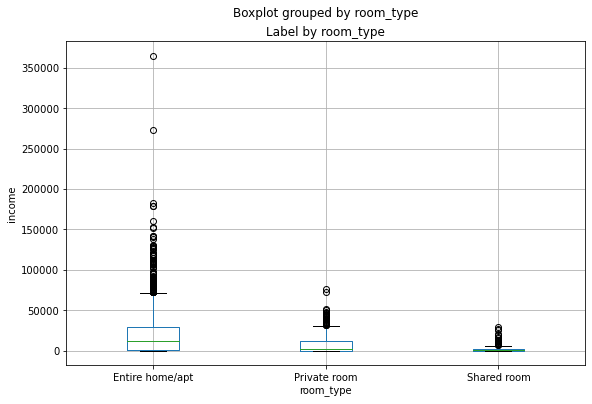

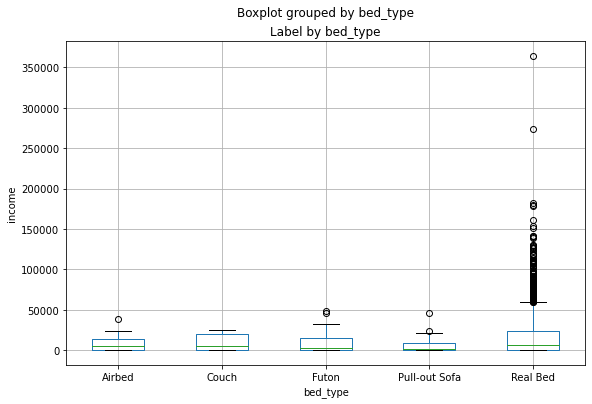

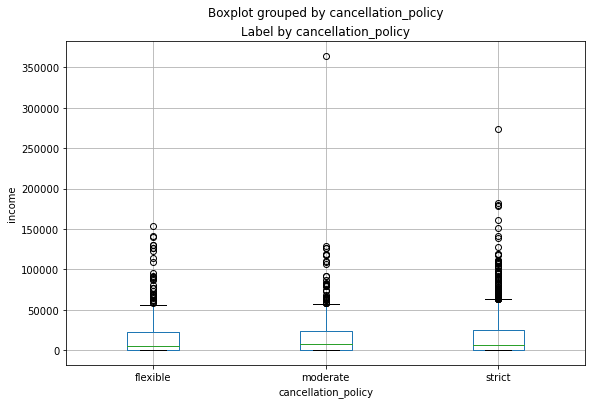

In [260]:
#categorical features

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df_listings.boxplot(column = 'EstimatedIncome', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("income")
plt.show()

Text(0.5, 0.98, 'Estimated annual income')

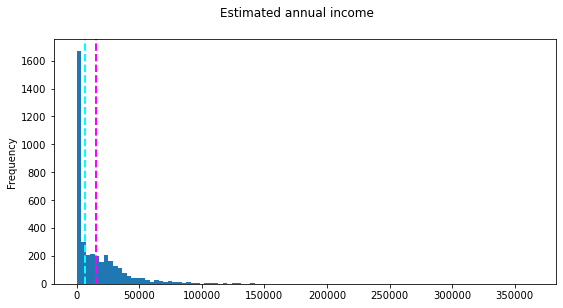

In [256]:
#label = df_listings["reviews_per_month"]
label = df_listings["EstimatedIncome"]
fig, ax = plt.subplots(1, 1, figsize = (9,4.5))

# Plot the histogram   
ax.hist(label, bins=100)
ax.set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax.axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Add a title to the Figure
fig.suptitle('Estimated annual income')


In [233]:
sns.heatmap(df_listings[numeric_features].corr(), annot=True, fmt=".2f")


ValueError: Boolean array expected for the condition, not object

/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_9113/2506457984.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listings['price'] = df_listings['price'].str.replace("[$, ]", "").astype("float")
/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_9113/2506457984.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listings['weekly_price'] = df_listings['weekly_price'].str.replace("[$, ]", "").astype(float, errors = 'raise')
/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_9113/2506457984.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listings['monthly_price'] = df_listings['monthly_price'].str.replace("[$, ]", "").astype(float, errors = 'raise')
/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_9113/2506457984.py:8: FutureWarning: The default value of regex will change from True to Fals

In [30]:
num_vars = df_listings[['host_acceptance_rate', 'host_total_listings_count', 'bathrooms', 'beds', 'price', 
                        'monthly_price', 'cleaning_fee', 'extra_people', 'maximum_nights', 'availability_60', 
                        'availability_365', 'review_scores_rating','review_scores_cleanliness', 
                        'review_scores_communication','review_scores_value' ]]
df_dropna = num_vars.dropna(axis = 0)
df_dropna

,host_acceptance_rate,host_total_listings_count,bathrooms,beds,price,monthly_price,cleaning_fee,extra_people,maximum_nights,availability_60,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_value
1,100%,6.0,1.0,1.0,$150.00,"$3,000.00",$40.00,$0.00,90,13,291,96.0,10.0,10.0,10.0
9,100%,6.0,1.0,1.0,$150.00,"$3,000.00",$40.00,$0.00,365,19,324,97.0,10.0,10.0,9.0
11,100%,1.0,1.0,1.0,$99.00,"$2,000.00",$150.00,$0.00,1125,21,229,97.0,10.0,10.0,9.0
12,100%,1.0,1.0,3.0,$245.00,"$5,800.00",$95.00,$0.00,14,60,362,98.0,10.0,10.0,10.0
13,100%,1.0,1.0,3.0,$165.00,"$5,000.00",$85.00,$20.00,1125,40,337,100.0,10.0,9.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,100%,1.0,1.0,1.0,$65.00,"$1,400.00",$25.00,$0.00,1125,6,269,95.0,9.0,10.0,10.0
3801,100%,1.0,1.0,1.0,$108.00,"$2,500.00",$45.00,$10.00,1125,56,85,100.0,10.0,10.0,10.0
3807,100%,1.0,1.0,1.0,$109.00,"$1,800.00",$25.00,$0.00,360,21,325,97.0,10.0,10.0,9.0
3809,100%,1.0,1.0,1.0,$120.00,"$2,200.00",$75.00,$0.00,30,60,365,80.0,7.0,9.0,8.0
